## Cable Stay Tensioning Calculation

In [2]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [3]:
# Initial data

Zk=1200  #kN
dv=15.98  #mm
theta=53.3 #degree
lk = 60000 #mm
Xik =60 #mm
KO = Xik/Zk #mm/kN
Eu = 194000 #MPa
Au = 150 #mm^2
nos = 12



# Display the value of x_k using Markdown syntax
display(Markdown("### Cable Data Input"))
display(Markdown(rf" - Designated jacking force,  $Z_k$ is {Zk} kN"))
display(Markdown(rf"- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is {Xik} mm."))
display(Markdown(rf"- Cable shortening to force ratio, $K_0$ is {KO} mm/kN."))
display(Markdown(rf"- Cable modulus of elasticity, $E_u$ is {Eu} MPa."))
display(Markdown(rf"- Cable section area, $A_u$ is {Au} $mm^2$."))
display(Markdown(rf"- Number of strand , {nos} strand."))


### Cable Data Input

 - Designated jacking force,  $Z_k$ is 1200 kN

- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is 60 mm.

- Cable shortening to force ratio, $K_0$ is 0.05 mm/kN.

- Cable modulus of elasticity, $E_u$ is 194000 MPa.

- Cable section area, $A_u$ is 150 $mm^2$.

- Number of strand , 12 strand.

In [4]:
def force_drop(strand, strand_jacking_load,current_length,total_shortening, total_force):
    current_length=lk-total_shortening
    strain_force_ratio=KO*Eu*Au/(current_length*1000)
    strand_shortening=KO*strand_jacking_load/(1+(strand-1)*strain_force_ratio)
    total_shortening=strand_shortening+total_shortening
    total_force=strand_jacking_load/(1+(strand-1)*strain_force_ratio)+total_force

    return strain_force_ratio, strand_shortening,total_shortening, current_length, total_force

def cycle_load_reading(final_shortening,total_shortening,strand_jacking_load):
    strand_partial_shortening=final_shortening-total_shortening
    drop_force=strand_partial_shortening*Eu*Au/(lk-total_shortening)/1000
    reduced_force=strand_jacking_load-drop_force

    return strand_partial_shortening, drop_force, reduced_force

def perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads):

    # Initialize lists to compile results

    strain_force_ratio_list = []
    strand_shortening_list = []
    total_shortening_list = []
    current_length_list = []
    total_force_list = []

    #Calculation of accumulated shortening and total force
    for strand in range(1,len(strand_jacking_loads)+1):
        # Access the jacking load for the current strand index
        strand_jacking_load = strand_jacking_loads[strand - 1]
    
        # Perform force drop calculation for the current strand
        strain_force_ratio, strand_shortening, total_shortening, current_length,    total_force = force_drop(
            strand, strand_jacking_load, current_length, total_shortening,  total_force
        )
        
        # Append results to lists
        strain_force_ratio_list.append(strain_force_ratio)
        strand_shortening_list.append(strand_shortening)
        total_shortening_list.append(total_shortening)
        current_length_list.append(current_length)
        total_force_list.append(total_force)
    
    # print(len(total_shortening_list))
    strand_partial_shortening_list = []
    drop_force_list = []
    reduced_force_list = []

    #Colculating Drop Force and Residual Force
    for strand in range(1,len(initial_jacking_loads)+1):
        #Access the final shortening
        final_shortening=total_shortening_list[-1]

        #Access the total shortening list and strand jacking load 
        total_shortening=total_shortening_list[strand- 1]
        strand_jacking_load=initial_jacking_loads[strand - 1]

        strand_partial_shortening, drop_force, reduced_force = cycle_load_reading(final_shortening,total_shortening,strand_jacking_load) 

        #append result to List 
        strand_partial_shortening_list.append(strand_partial_shortening)
        drop_force_list.append(drop_force)
        reduced_force_list.append(reduced_force)

    return drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list

def tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads):

    accumulated_load_list=initial_jacking_loads.copy()
    table_data=[]
   
    for i in range(cycle_number):
        drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list=perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads)

        #Extracting previous tension result for the next tensioning cycle
        strand_jacking_loads = drop_force_list
        current_length=current_length_list[-1]
        total_shortening=total_shortening_list[-1]
        total_force=total_force_list[-1]

        #Upddating accumulated load list
        for j in range(len(accumulated_load_list)):
            accumulated_load_list[j] += drop_force_list[j]

        # Add data to the table
        table_data.append([i+1] + reduced_force_list)

    return reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data



    

#### Multi Cycle Iteration 

[99.99324851468445, 99.9958939714905, 99.99764351491199, 99.99874673533347, 99.99939964468399, 99.99975330589346, 99.99992109876143, 99.99998484808931, 100.0, 100.0, 100.0, 100.0]
[0.00675148531555324, 0.004106028509494107, 0.0023564850880103878, 0.0012532646665286051, 0.0006003553160081252, 0.00024669410653481455, 7.890123857299133e-05, 1.5151910693375659e-05, 0.0, 0.0, 0.0, 0.0]
[59940.02425699717, 59940.01631688373, 59940.01086778591, 59940.00726408625, 59940.00499167928, 59940.00364682049, 59940.002918351274, 59940.00257273254, 59940.00244142207, 59940.002410212255, 59940.002410212255, 59940.002410212255]
[59.98368311626896, 59.98913221408666, 59.99273591374953, 59.99500832072291, 59.99635317950424, 59.997081648726414, 59.99742726745571, 59.99755857793266, 59.99758978774585, 59.99758978774585, 59.99758978774585, 59.99758978774585]
[126.04673192737567, 123.1326214482409, 120.34991949784349, 117.68994077656113, 115.14474556312615, 112.70706193019755, 110.37021745963851, 108.128079133

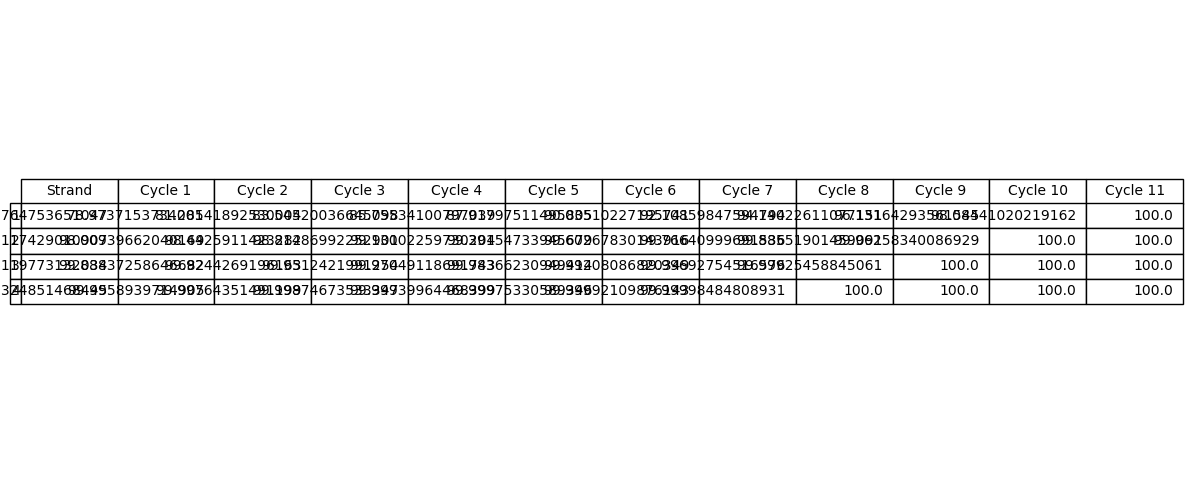

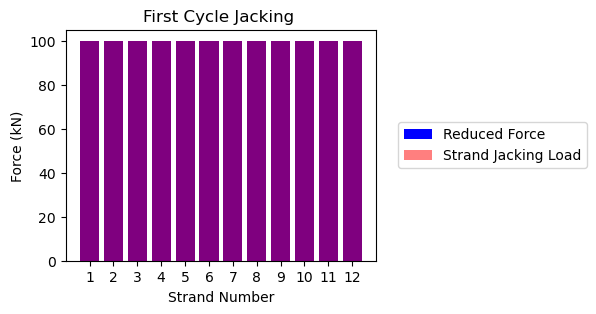

In [11]:
# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
initial_jacking_loads = [strand_tensioning] * nos
strand_jacking_loads=initial_jacking_loads

#initial input
current_length=lk
total_shortening=0
total_force=0
cycle_number = 4

# drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list= perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force)

# print(current_length_list)
# print(drop_force_list)
# print(total_shortening_list)
# print(total_force_list)
# print(reduced_force_list)


reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data=tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads)

print(reduced_force_list)
print(drop_force_list)
print(current_length_list)
print(total_shortening_list)
print(accumulated_load_list)
print(initial_jacking_loads)

print(table_data)
#Calculating Force Distribution Factor 
gamma_xi=total_shortening_list[-1]/Xik
print(f"{gamma_xi*100:.2f}%")



#================ TABLE DATA ==================================
# Extracting data
column_labels = ['Strand'] + [f'Cycle {i}' for i in range(1, len(table_data[0]) + 1)]
row_labels = [entry[0] for entry in table_data]
cell_values = [entry[1:] for entry in table_data]

# Create table
plt.figure(figsize=(10, 6))
table = plt.table(cellText=cell_values, rowLabels=row_labels, colLabels=column_labels, loc='center')


# Formatting
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.axis('off')
plt.show()

# ================ PLOTTING GRAPH ==============================

# Generate x-axis values (strand numbers)
strand_numbers = list(range(1, len(reduced_force_list) + 1))

# Set the style to a dark theme
# plt.style.use('dark_background')
plt.style.use('default')

# Set the desired figure size
plt.figure(figsize=(4, 3))  # Adjust width and height as needed

# Create bar chart
plt.bar(strand_numbers, reduced_force_list, label='Reduced Force', color='blue', alpha=1)
plt.bar(strand_numbers, initial_jacking_loads, label='Strand Jacking Load', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Strand Number')
plt.ylabel('Force (kN)')
plt.title('First Cycle Jacking ')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set tick positions and labels for x-axis
plt.xticks(strand_numbers, strand_numbers)

# Show plot

plt.show()


### Single Cycle Trial

[100.0015939769427, 100.00073563377363, 100.00011815888377, 99.99970250538237, 99.9994527745337, 99.99933628220187, 99.9993235559433, 99.99938828033977, 99.99950720444589, 99.99966002225565, 99.99982923472497, 100.0]
[26.045137950432977, 23.13188581446727, 20.34980133895972, 17.69023827117875, 15.145292788592462, 12.707725647995685, 10.370893903695197, 8.128690853541853, 5.975493081741079, 3.906113641259605, 1.9157605630834054, 0.0]
[60000, 59993.69766340363, 59987.68681081882, 59981.94771798043, 59976.462398066324, 59971.21441492946, 59966.18871985064, 59961.37150843573, 59956.75009482301, 59952.312800811735, 59948.048857891976, 59943.94832046163]
[6.302336596368784, 12.313189181180848, 18.052282019569688, 23.5376019336791, 28.785585070538982, 33.811280149362624, 38.628491564268344, 43.249905176988506, 47.687199188268735, 51.95114210802539, 56.05167953836418, 59.99801122866831]
[152.09186987780865, 146.26450726270818, 140.6997208368032, 135.3801790477399, 130.2900383517186, 125.414787

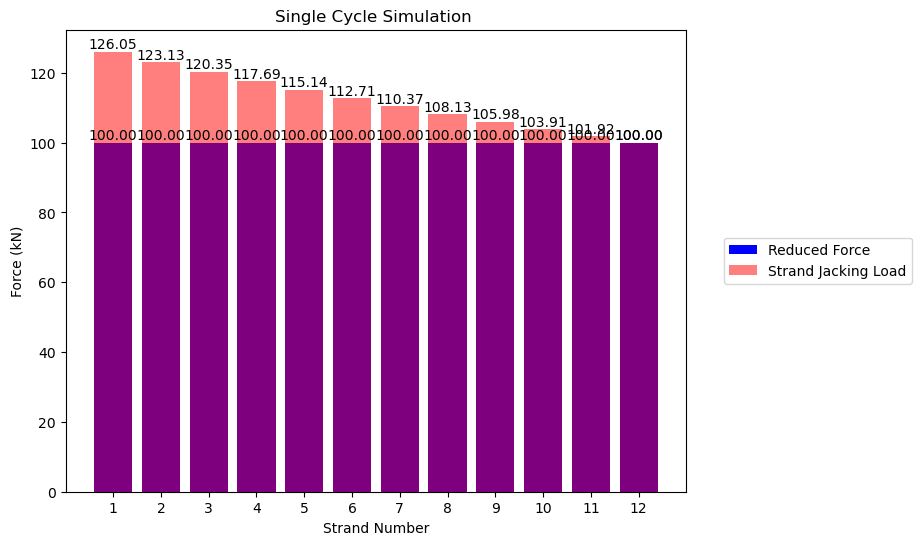

In [16]:
# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
initial_jacking_loads = accumulated_load_list
strand_jacking_loads=initial_jacking_loads

#initial input
current_length=lk
total_shortening=0
total_force=0
cycle_number = 1

# drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list= perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force)

# print(current_length_list)
# print(drop_force_list)
# print(total_shortening_list)
# print(total_force_list)
# print(reduced_force_list)


reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data=tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads)

print(reduced_force_list)
print(drop_force_list)
print(current_length_list)
print(total_shortening_list)
print(accumulated_load_list)
print(initial_jacking_loads)

#Calculating Force Distribution Factor 
gamma_xi=total_shortening_list[-1]/Xik
print(f"{gamma_xi*100:.2f}%")

# ================ PLOTTING GRAPH ==============================

# Generate x-axis values (strand numbers)
strand_numbers = list(range(1, len(reduced_force_list) + 1))

# Set the style to a dark theme
# plt.style.use('dark_background')
plt.style.use('default')

# Set the desired figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# Create bar chart
plt.bar(strand_numbers, reduced_force_list, label='Reduced Force', color='blue', alpha=1)
plt.bar(strand_numbers, initial_jacking_loads, label='Strand Jacking Load', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Strand Number')
plt.ylabel('Force (kN)')
plt.title('Single Cycle Simulation ')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set tick positions and labels for x-axis
plt.xticks(strand_numbers, strand_numbers)

# Display values on top of each bar
for i in range(len(reduced_force_list)):
    plt.text(strand_numbers[i], reduced_force_list[i], f'{reduced_force_list[i]:.2f}', ha='center', va='bottom')

for i in range(len(initial_jacking_loads)):
    plt.text(strand_numbers[i], initial_jacking_loads[i], f'{initial_jacking_loads[i]:.2f}', ha='center', va='bottom')



# Show plot

plt.show()

In [ ]:
# Display the value of x_k using Markdown syntax
display(Markdown("### First cycle of strand tensioning"))
display(Markdown(rf" - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{{k,i-1}}$"))
display(Markdown(rf" - Strain to force ratio, $\eta_i = \dfrac{{K_0 \cdot E_u \cdot A_u}}{{l_{{k,i}}}}$"))



### First cycle of strand tensioning

 - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{k,i-1}$

 - Strain to force ratio, $\eta_i = \dfrac{K_0 \cdot E_u \cdot A_u}{l_{k,i}}$